## 1. <a id='toc2_'></a>[Model Descprition](#toc0_)

**Solow Growth Model**

The Solow growth model is a classical economic model used to analyze long-term economic growth. It was developed by Robert Solow in the 1950s. The model explains how capital accumulation, labor or population growth, and technological progress affect the growth of an economy.

**Key Variables and Parameters**

K: Capital

L: Labor (assumed to be constant in this model)

A: Technology level (assumed to be constant in this model)

Y: Output

C: Consumption

I: Investment

G: Government spending

s: Savings rate

δ: Depreciation rate

n: Population growth rate

g: Technological progress rate

**Key Equations**

1. Production Function:
The production function describes how capital and labor are combined to produce output:

$$
Y = K^\alpha L^{1-\alpha} A
$$

For simplicity, we assume L and A are constant and equal to 1:
$$
Y = K^\alpha
$$

 
2. Capital Accumulation Equation:
The change in capital stock over time is given by the difference between investment and depreciation:

$$
\Delta K = I - \delta K
$$

3. Savings and Investment:
A fixed fraction s of output is saved and invested:

$$
I = sY
$$

4. Consumption:
The remaining output after savings is consumed:

$$
C = (1 - s)Y
$$

5. Government Spending:
Government spending is a fixed fraction of output:

$$
G = {gov\_spending}\cdot Y
$$

6. Steady State Condition:
In the steady state, capital stock remains constant, so the change in capital (ΔK) is zero. The steady state condition is:
$$
sY = (\delta + n + g)K + G
$$

## 2. <a id='toc2_'></a>[Imports](#toc0_)

We import the SolowModel class, where we have defined the Solow growth model. The SolowModel class includes methods for setting up parameters, calculating steady states using scipy.optimize.fsolve, simulating dynamics, and applying various shocks. This allows us to perform numerical analyses and explore various economic scenarios.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from solow_model import SolowModel
import pandas as pd

## 3. <a id='toc2_'></a>[Model Solutions](#toc0_)

We initialize the Solow growth model using the SolowModel class and find the steady-state values. The find_steady_state method uses scipy.optimize.fsolve to solve for the steady-state capital, where we ensure that the model satisfies the equilibrium condition. This allows us to analyze the long-term behavior of the economy under the given parameters.

In [2]:
# Initialize the model
model = SolowModel()
model.find_steady_state()

**Initial Steady States**

In this section, we calculate the steady state values of key economic variables: capital, output, consumption, investment, and government spending. These values are stored in a dictionary and then converted into a DataFrame so we can visualize our outputs easly.

We use the steady state values for understanding the long-term behavior of the economy under the Solow growth model. The steady state capital is approximately 1.38, which indicates the level of capital where the economy stabilizes. The steady state output is around 1.10, showing the economy's stable production level. Consumption and investment values at steady state are about 0.88 and 0.22, which reflects the economy's allocation of resources. Government spending at steady state is approximately 0.11, which highlights the role of fiscal policy in the model.

In [3]:
# Display steady state values
ss_values = {
    "Steady State Capital": model.ss.K,
    "Steady State Output": model.ss.Y,
    "Steady State Consumption": model.ss.C,
    "Steady State Investment": model.ss.I,
    "Steady State Government Spending": model.ss.G
}

df_ss = pd.DataFrame.from_dict(ss_values, orient='index', columns=['Value'])
print("Steady State Values")
print(df_ss)

Steady State Values
                                     Value
Steady State Capital              1.375444
Steady State Output               1.100355
Steady State Consumption          0.880284
Steady State Investment           0.220071
Steady State Government Spending  0.110036


**Simualtion Function**

We simulate our model as it allows us to analyze how changes in parameters (savings rate, discount factor etc.) affect the economy's trajectory and steady state.

In this section, we define a function simulate_with_shocks to simulate the Solow model under different economic shocks. This function initializes the model, applies a specified shock, finds the new steady state using scipy.optimize.fsolve, and solves the model's transition path.

The find_steady_state method within the SolowModel class uses scipy.optimize.fsolve to solve for the steady-state capital (K). The fsolve function finds the roots of a function and solves for K where the steady-state condition is met. Thus, fsolve iteratively adjusts K to make the steady_state_equation equal to zero, indicating the steady-state condition.

In [4]:
# Function to simulate the model with different shocks
def simulate_with_shocks(shock_type, magnitude, initial_value):
    model = SolowModel()
    model.par.K_lag_ini = initial_value
    model.apply_shock(shock_type, magnitude)
    model.find_steady_state()
    model.solve()
    return model

**Temporary Shock Analysis**

We simulate the Solow model with a shock to the discount factor, increasing it by 0.05. This involves initializing the model, applying the shock, finding the new steady state using scipy.optimize.fsolve, and solving for the transition path.

Despite the applied shock, the steady state values remain unchanged from the original values. This indicates that the discount factor shock does not affect the steady state directly. It may, however, impact the transition dynamics. The plots show how capital, output, consumption, and investment evolve over time, converging towards their steady states. The unchanged steady states suggest that the long-term equilibrium is resilient to short-term changes in the discount factor. The economy adjusts through its dynamic path, but the fundamental steady state, driven by parameters like the savings rate and depreciation rate, remains stable.

In [5]:
# Discount factor shock
shock_type = 'discount_factor'
shock_magnitude = 0.05
initial_value = 1.0

model_shock = simulate_with_shocks(shock_type, shock_magnitude, initial_value)

# Steady state values after shock
ss_values_shock = {
    "Steady State Capital": model_shock.ss.K,
    "Steady State Output": model_shock.ss.Y,
    "Steady State Consumption": model_shock.ss.C,
    "Steady State Investment": model_shock.ss.I,
    "Steady State Government Spending": model_shock.ss.G
}

df_ss_shock = pd.DataFrame.from_dict(ss_values_shock, orient='index', columns=['Value'])
print("Steady State Values After Shock")
print(df_ss_shock)

Steady State Values After Shock
                                     Value
Steady State Capital              1.375444
Steady State Output               1.100355
Steady State Consumption          0.880284
Steady State Investment           0.220071
Steady State Government Spending  0.110036


***Graphical Depictions: Temporary Shocks***

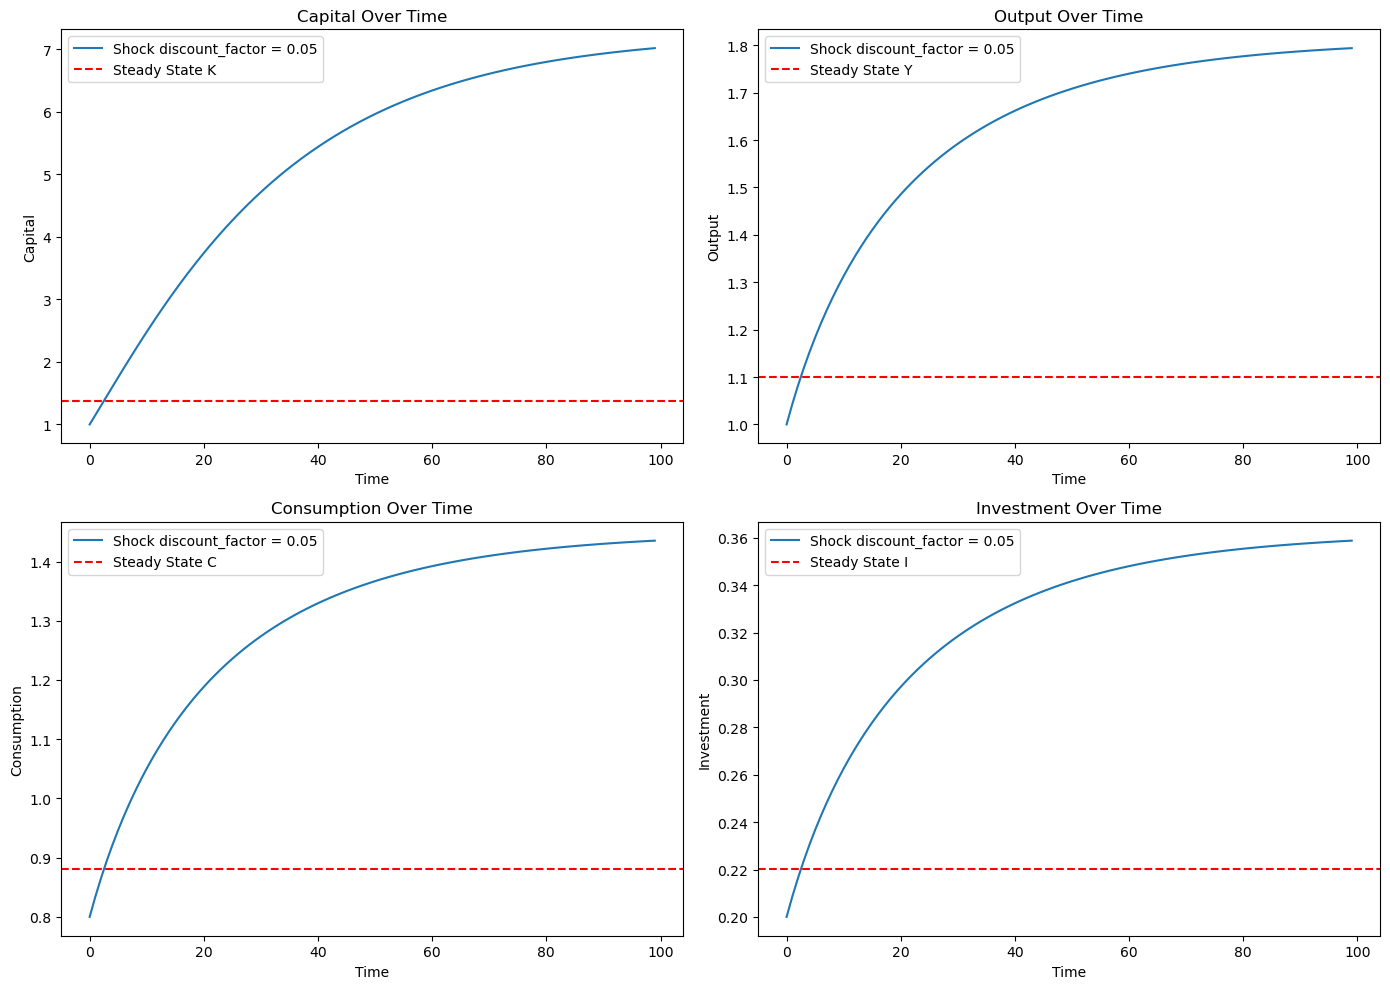

In [6]:
# Results
plt.figure(figsize=(14, 10))

path = model_shock.path
ss = model_shock.ss

plt.subplot(2, 2, 1)
plt.plot(path.K, label=f'Shock {shock_type} = {shock_magnitude}')
plt.axhline(y=ss.K, color='r', linestyle='--', label='Steady State K')
plt.title('Capital Over Time')
plt.xlabel('Time')
plt.ylabel('Capital')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(path.Y, label=f'Shock {shock_type} = {shock_magnitude}')
plt.axhline(y=ss.Y, color='r', linestyle='--', label='Steady State Y')
plt.title('Output Over Time')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(path.C, label=f'Shock {shock_type} = {shock_magnitude}')
plt.axhline(y=ss.C, color='r', linestyle='--', label='Steady State C')
plt.title('Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(path.I, label=f'Shock {shock_type} = {shock_magnitude}')
plt.axhline(y=ss.I, color='r', linestyle='--', label='Steady State I')
plt.title('Investment Over Time')
plt.xlabel('Time')
plt.ylabel('Investment')
plt.legend()

plt.tight_layout()
plt.show()

**Permanent Shock Analysis**

In this section, we simulate the Solow model with a permanent shock to the savings rate, increasing it by 0.1. The function simulate_with_shocks initializes the model, applies the shock, finds the new steady state using scipy.optimize.fsolve, and solves for the transition path.

The steady state values change more significantly with the permanent shock compared to the previous section. The steady state capital increases to approximately 3.70, and output rises to about 1.49. Consumption and investment also increase, reflecting higher economic activity due to increased savings.

A higher savings rate leads to more investment, which boosts capital accumulation. This results in higher output and consumption in the long run. Thus, our results match our model expectations - The steady state values change because the savings rate directly affects the economy's ability to invest and grow.

In [7]:
# Savings rate shock
permanent_shock_magnitude = 0.1
model_permanent_shock = simulate_with_shocks('savings_rate', permanent_shock_magnitude, initial_value)

# Steady state values after permanent shock
ss_values_permanent_shock = {
    "Steady State Capital": model_permanent_shock.ss.K,
    "Steady State Output": model_permanent_shock.ss.Y,
    "Steady State Consumption": model_permanent_shock.ss.C,
    "Steady State Investment": model_permanent_shock.ss.I,
    "Steady State Government Spending": model_permanent_shock.ss.G
}

df_ss_permanent_shock = pd.DataFrame.from_dict(ss_values_permanent_shock, orient='index', columns=['Value'])
print("Steady State Values After Permanent Shock")
print(df_ss_permanent_shock)

Steady State Values After Permanent Shock
                                     Value
Steady State Capital              3.702420
Steady State Output               1.480968
Steady State Consumption          1.036678
Steady State Investment           0.444290
Steady State Government Spending  0.148097


***Graphical Depictions: Permanent Shocks***

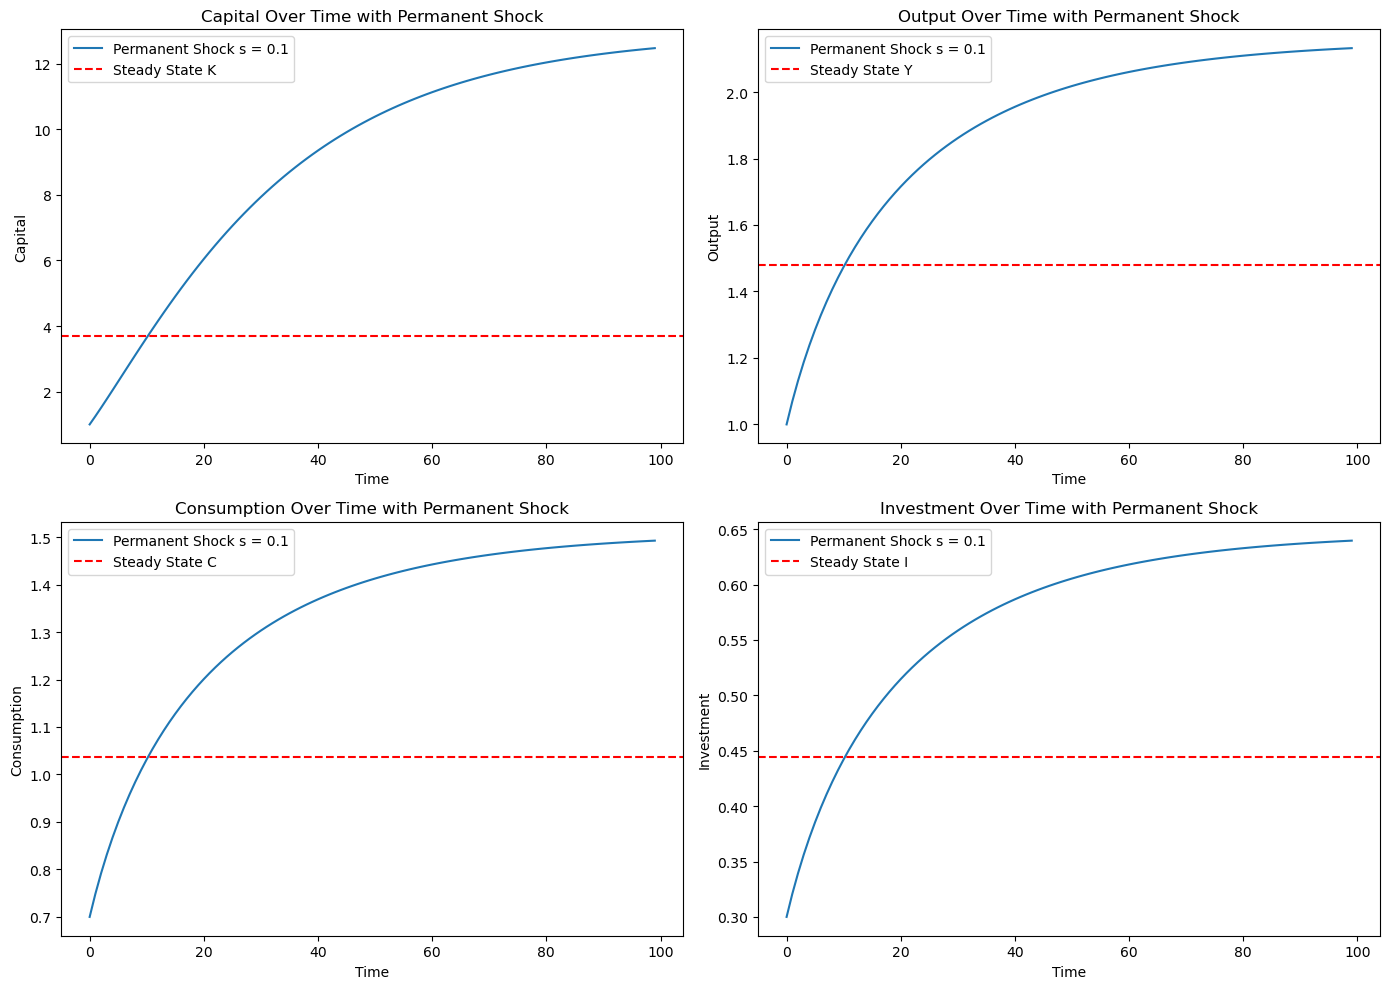

In [8]:
# Paths for the permanent shock
path_permanent = model_permanent_shock.path
ss_permanent = model_permanent_shock.ss

# Results for permanent shock
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(path_permanent.K, label=f'Permanent Shock s = {permanent_shock_magnitude}')
plt.axhline(y=ss_permanent.K, color='r', linestyle='--', label='Steady State K')
plt.title('Capital Over Time with Permanent Shock')
plt.xlabel('Time')
plt.ylabel('Capital')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(path_permanent.Y, label=f'Permanent Shock s = {permanent_shock_magnitude}')
plt.axhline(y=ss_permanent.Y, color='r', linestyle='--', label='Steady State Y')
plt.title('Output Over Time with Permanent Shock')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(path_permanent.C, label=f'Permanent Shock s = {permanent_shock_magnitude}')
plt.axhline(y=ss_permanent.C, color='r', linestyle='--', label='Steady State C')
plt.title('Consumption Over Time with Permanent Shock')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(path_permanent.I, label=f'Permanent Shock s = {permanent_shock_magnitude}')
plt.axhline(y=ss_permanent.I, color='r', linestyle='--', label='Steady State I')
plt.title('Investment Over Time with Permanent Shock')
plt.xlabel('Time')
plt.ylabel('Investment')
plt.legend()

plt.tight_layout()
plt.show()

**Sensitivity: Depreciation Rate**

Lastly, we will include a sensitivity analysis. Sensitivity analysis is crucial to understand how sensitive the model's outcomes are to changes in key parameters. We vary the depreciation rate, so we can observe how changes in capital depreciation affect the economy's steady state. This helps us assess the robustness of our model and the potential impact of policy changes or exogenous shocks.

We define a function sensitivity_analysis_depreciation_rate to study the effects of varying the depreciation rate on the steady state values of key economic variables. The function iterates over a range of depreciation rates, initializes the model with each rate, determines the steady state using scipy.optimize.fsolve, and collects the results in a DataFrame.

We see  that as the depreciation rate increases, steady state capital, output, consumption, and investment all decrease. This is evident both from the numerical results and the plotted graphs, where the graphs show a clear inverse relationship: Higher depreciation leads to lower steady state capital, output, consumption and investment.

In [9]:
# Define a function to perform sensitivity analysis on the depreciation rate
def sensitivity_analysis_depreciation_rate(delta_values, initial_value):
    results = []
    for delta in delta_values:
        model = SolowModel()
        model.par.K_lag_ini = initial_value
        model.par.delta = delta  # Vary the depreciation rate
        model.find_steady_state()
        results.append({
            "Depreciation Rate": delta,
            "Steady State Capital": model.ss.K,
            "Steady State Output": model.ss.Y,
            "Steady State Consumption": model.ss.C,
            "Steady State Investment": model.ss.I
        })
    return pd.DataFrame(results)

# Range of depreciation rates for sensitivity analysis
delta_values = np.linspace(0.01, 0.1, 10)  # Varying from 0.01 to 0.1
initial_value = 1.0

# Perform the sensitivity analysis
sensitivity_results = sensitivity_analysis_depreciation_rate(delta_values, initial_value)

# Results
print("Sensitivity Analysis Results")
print(sensitivity_results)

Sensitivity Analysis Results
   Depreciation Rate  Steady State Capital  Steady State Output  \
0               0.01              3.702420             1.480968   
1               0.02              2.691800             1.345900   
2               0.03              2.074564             1.244738   
3               0.04              1.664518             1.165163   
4               0.05              1.375444             1.100355   
5               0.06              1.162433             1.046189   
6               0.07              1.000000             1.000000   
7               0.08              0.872705             0.959976   
8               0.09              0.770697             0.924837   
9               0.10              0.687423             0.893649   

   Steady State Consumption  Steady State Investment  
0                  1.184775                 0.296194  
1                  1.076720                 0.269180  
2                  0.995791                 0.248948  
3            

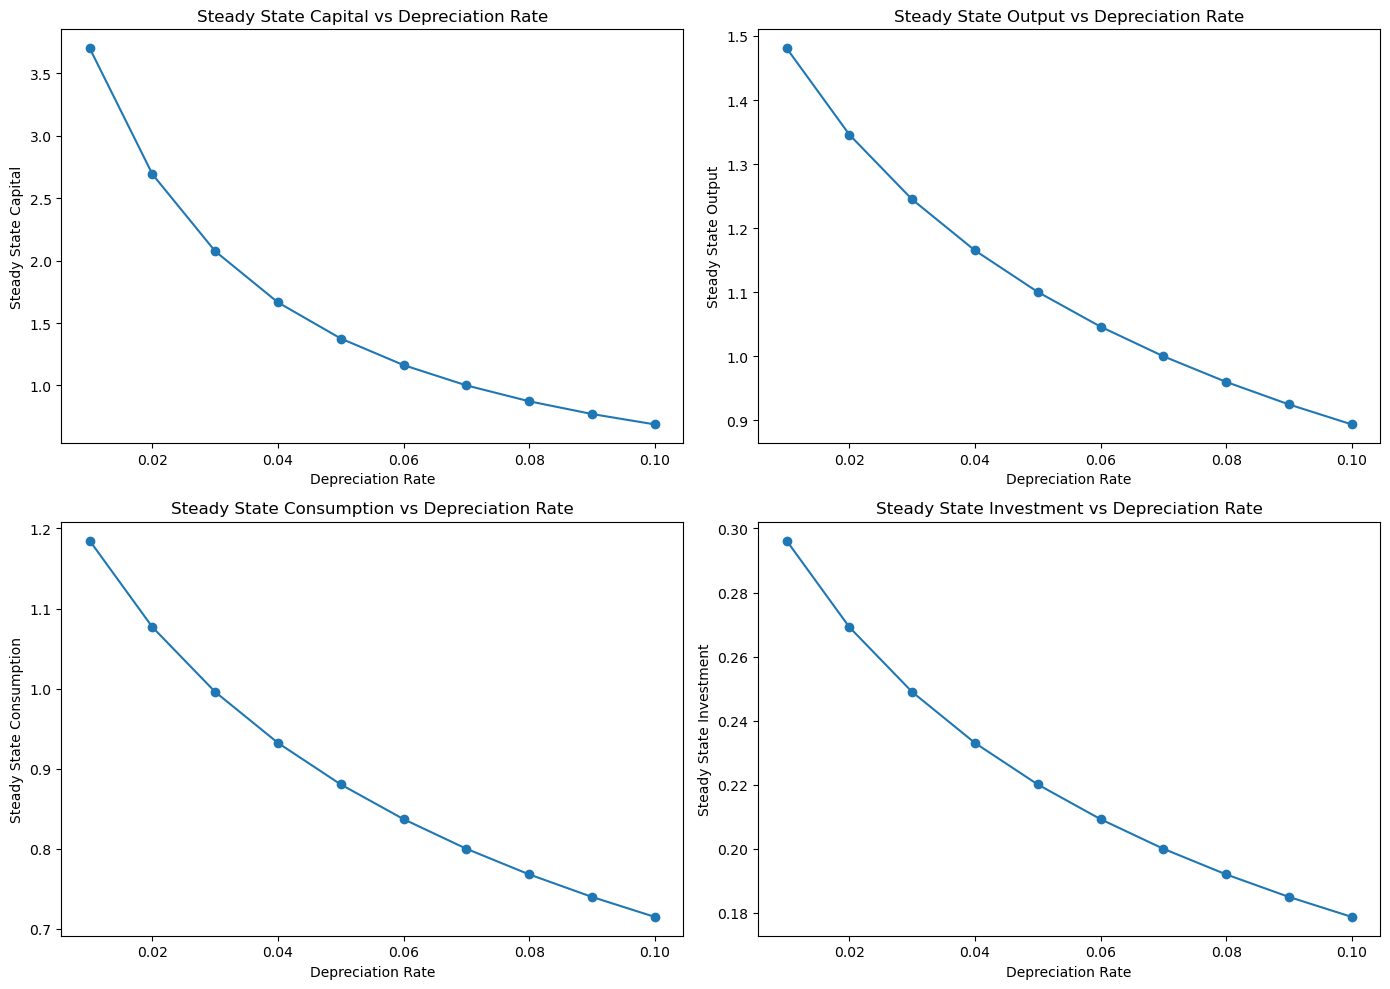

In [10]:
# Plot the results of the sensitivity analysis
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(sensitivity_results["Depreciation Rate"], sensitivity_results["Steady State Capital"], marker='o')
plt.title('Steady State Capital vs Depreciation Rate')
plt.xlabel('Depreciation Rate')
plt.ylabel('Steady State Capital')

plt.subplot(2, 2, 2)
plt.plot(sensitivity_results["Depreciation Rate"], sensitivity_results["Steady State Output"], marker='o')
plt.title('Steady State Output vs Depreciation Rate')
plt.xlabel('Depreciation Rate')
plt.ylabel('Steady State Output')

plt.subplot(2, 2, 3)
plt.plot(sensitivity_results["Depreciation Rate"], sensitivity_results["Steady State Consumption"], marker='o')
plt.title('Steady State Consumption vs Depreciation Rate')
plt.xlabel('Depreciation Rate')
plt.ylabel('Steady State Consumption')

plt.subplot(2, 2, 4)
plt.plot(sensitivity_results["Depreciation Rate"], sensitivity_results["Steady State Investment"], marker='o')
plt.title('Steady State Investment vs Depreciation Rate')
plt.xlabel('Depreciation Rate')
plt.ylabel('Steady State Investment')

plt.tight_layout()
plt.show()

## 4. <a id='toc2_'></a>[Concluding remarks](#toc0_)

In this analysis, we have used numerical methods and Python libraries to explore the Solow growth model. The primary tools included numpy for numerical operations and array manipulations, scipy.optimize.fsolve for solving steady state equations by finding roots, matplotlib.pyplot for visualizing the results with plots, and pandas for organizing and displaying data in tabular form. 

The SolowModel class included initialization methods for defining parameters such as the savings rate, depreciation rate, and initial capital. The steady state calculation was performed using scipy.optimize.fsolve to ensure that the equilibrium conditions were met. The class also incorporated methods for dynamic simulation, solving the transition path of the economy over time, and applying shocks to analyze their effects.

We used commands to initialize the model and calculate steady state values using the find_steady_state method. We constructed shock analyses by simulating shocks to the model and observing both the dynamic transition and new steady states. Moreover, we performed sensitivity analysis by varying the depreciation rate and analyzing its impact on steady state values.

*Economic results*

In the shock analysis, we applied a temporary shock to the discount factor. Despite the shock, the steady state values remained unchanged, which indicated the model's resilience to short-term changes. The dynamic path depicted how the economy adjusted back to the original steady state, which may illustrate the robustness of the model.

When we applied a permanent increase in the savings rate, we observed significant changes in the steady state values. The higher savings rate led to increased capital accumulation, output, consumption, and investment. This result aligns with economic intuition, as increased savings leads to more investment and growth.

The sensitivity analysis of the depreciation rate revealed that higher depreciation rates led to lower steady state values for capital, output, consumption, and investment. This outcome is expected because higher depreciation reduces the effective capital stock, which lowers production and economic activity. 

*Pontential improvements*

Initially, we wanted to analyze the RBC (Real Business Cycle) model. However, we encountered complications, such as difficulties calibrating the model parameters, difficulties in solving the dynamic stochastic differential equations, and the challenge of incorporating realistic shocks. These challenges led us to switch to the Solow growth model.

The numerical methods, particularly scipy.optimize.fsolve, solved the steady state conditions and analyzed the model's sensitivity to parameter changes. However, we could potentially improved our analysis by extending sensitivity analysis to other parameters and introducing stochastic shocks for more complex insights.